# Métodos de Seleção

Quando trabalhamos com grandes conjuntos de dados, que possuem muitas colunas, devemos analisar com calma se todas as colunas são necessárias para a atividade que vamos desenvolver, seja uma análise de dados, um treinamento de rede neural ou qualquer outra coisa que seja. Para auxiliar nessa análise existem os métodos de seleção, no exemplo a seguir serão abordados três métodos: *wrapper, filter* e *embedded*.

No código abaixo serão carregadas as bibliotecas necessárias para os exemplos, além disso, também serão carregados os dados que vamos analisar.

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

Carregando o dataset

In [2]:
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   # Matriz de características
y = df["MEDV"]          # Variável alvo
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Método de Seleção *Filter* (filtro)

Nesse método apenas algumas colunas serão usadas, o resto será descartado seguindo algum requisito. Esse requisito é determinado pelo usuário, que escolhe uma coluna que deseja analisar e a partir dessa coluna serão descobertos quais outras colunas têm forte correlação com a escolhida pelo analista.

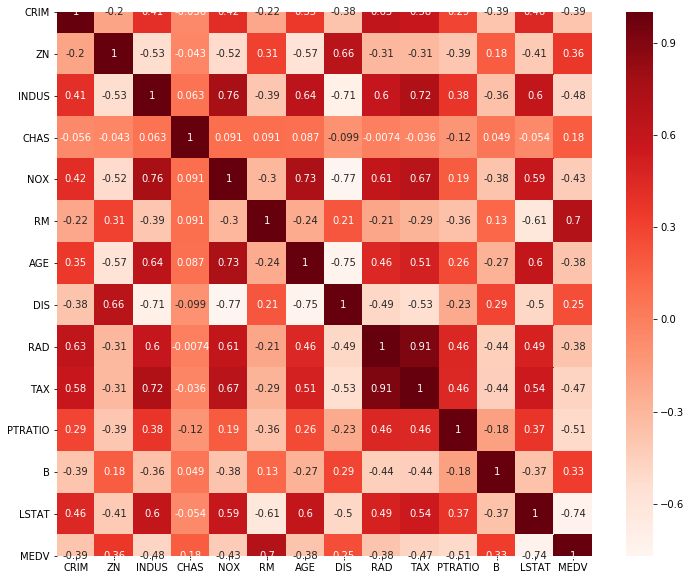

In [3]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
cor_target = abs(cor["MEDV"])
# Selecionando características com correlação forte
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

Foi selecionado um nível de correlação (seja positivo ou negativo) maior que 0.5, o que não estiver nessa regra pode ser ignorado, a partir disso, o conjunto de dados que será usado só vai conter as colunas RM, PTRATIO, LSTAT E MEDV (essa última foi a que usamos como principal).

# Método *wrapper* (embalador)

O método *wrapper* precisa de um algoritmo de aprendizado de máquina, e usa como parâmetro a performance dele para avaliar as colunas. Então dependendo do desempenho do algoritmo, você irá adicionar ou remover características. Por ser um método que depende da aplicação do algoritmo, ele é computacionalmente caro mas é mais preciso que o método do filtro.

# Usando *Backward Elimination*

Nesse método, que é um tipo de *wrapper*, nós passamos todas as colunas para o modelo, depois disso o algoritmo checa a performance e passa a eliminar as *features* com as piores performances, uma por uma, até que o desempenho geral do modelo se torne aceitável.

In [0]:
X_1 = sm.add_constant(X)
# Ajustando sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

In [9]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05 ):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
